In [13]:
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt

conn = sqlite3.connect('poker_updated.db')
c = conn.cursor()

In [211]:
net_gains_df = pd.read_sql_query('SELECT player_ID, SUM(net_gain) AS total_net_gain FROM Hands \
GROUP BY player_ID;', conn)
print("rows: ", net_gains_df.shape[0])
print(net_gains_df.head(10))

rows:  2397
          player_ID  total_net_gain
0     !MushroomMan!           45.24
1              ....            4.25
2             00MOD           -6.07
3          01001111          -13.37
4        0nlyDaNuts          126.79
5  1000_na_nl25_aga          -96.95
6          10071995           14.40
7         100stacks          -31.34
8        11-10-1964          -51.71
9         12monkeys          -29.41


In [212]:
total_games_df = pd.read_sql_query('SELECT player_ID, COUNT(*) AS total_games FROM Hands \
    GROUP BY player_ID;', conn)
print("rows: ", total_games_df.shape[0])
print(total_games_df.head(10))

rows:  2397
          player_ID  total_games
0     !MushroomMan!           54
1              ....           83
2             00MOD           10
3          01001111           22
4        0nlyDaNuts          260
5  1000_na_nl25_aga          305
6          10071995           81
7         100stacks           50
8        11-10-1964           64
9         12monkeys          242


In [213]:
summary_df = pd.merge(net_gains_df, total_games_df, on='player_ID')
print("rows: ", summary_df.shape[0])
print(summary_df.head(10))

rows:  2397
          player_ID  total_net_gain  total_games
0     !MushroomMan!           45.24           54
1              ....            4.25           83
2             00MOD           -6.07           10
3          01001111          -13.37           22
4        0nlyDaNuts          126.79          260
5  1000_na_nl25_aga          -96.95          305
6          10071995           14.40           81
7         100stacks          -31.34           50
8        11-10-1964          -51.71           64
9         12monkeys          -29.41          242


In [214]:
preflop_folds_df = pd.read_sql_query('''SELECT player_ID, COUNT(*) AS num_preflop_folds FROM Actions 
    WHERE round_k = 0 AND action_id = 'f'
    GROUP BY player_ID;''', conn)
summary_df = pd.merge(summary_df, preflop_folds_df, on='player_ID')
print("rows: ", summary_df.shape[0])
print(summary_df.head(10))

rows:  2247
          player_ID  total_net_gain  total_games  num_preflop_folds
0     !MushroomMan!           45.24           54                 43
1              ....            4.25           83                 59
2             00MOD           -6.07           10                  3
3          01001111          -13.37           22                 16
4        0nlyDaNuts          126.79          260                199
5  1000_na_nl25_aga          -96.95          305                221
6          10071995           14.40           81                 64
7         100stacks          -31.34           50                 42
8        11-10-1964          -51.71           64                 42
9         12monkeys          -29.41          242                191


In [215]:
showdowns_df = pd.read_sql_query('''SELECT player_ID, COUNT(*) AS num_showdowns FROM Actions \
    WHERE round_k = 3 AND action_id <> 'f'\
    GROUP BY player_ID \
    ORDER BY player_ID;''', conn)
summary_df = pd.merge(summary_df, showdowns_df, on='player_ID')
print("rows: ", summary_df.shape[0])
print(summary_df.head(10))

rows:  1782
          player_ID  total_net_gain  total_games  num_preflop_folds  \
0     !MushroomMan!           45.24           54                 43   
1              ....            4.25           83                 59   
2             00MOD           -6.07           10                  3   
3          01001111          -13.37           22                 16   
4        0nlyDaNuts          126.79          260                199   
5  1000_na_nl25_aga          -96.95          305                221   
6          10071995           14.40           81                 64   
7         100stacks          -31.34           50                 42   
8        11-10-1964          -51.71           64                 42   
9         12monkeys          -29.41          242                191   

   num_showdowns  
0              1  
1              2  
2              1  
3              1  
4             10  
5             15  
6              7  
7              3  
8              6  
9              9

In [218]:
summary_df['avg_net_gain'] = summary_df['total_net_gain']/summary_df['total_games']
summary_df['preflop_fold_rate'] = summary_df['num_preflop_folds']/summary_df['total_games']
summary_df['showdown_rate'] = summary_df['num_showdowns']/summary_df['total_games']
print(summary_df.head(10))

          player_ID  total_net_gain  total_games  num_preflop_folds  \
0     !MushroomMan!           45.24           54                 43   
1              ....            4.25           83                 59   
2             00MOD           -6.07           10                  3   
3          01001111          -13.37           22                 16   
4        0nlyDaNuts          126.79          260                199   
5  1000_na_nl25_aga          -96.95          305                221   
6          10071995           14.40           81                 64   
7         100stacks          -31.34           50                 42   
8        11-10-1964          -51.71           64                 42   
9         12monkeys          -29.41          242                191   

   num_showdowns  preflop_fold_rate  showdown_rate  avg_net_gain  
0              1           0.796296       0.018519      0.837778  
1              2           0.710843       0.024096      0.051205  
2              1 

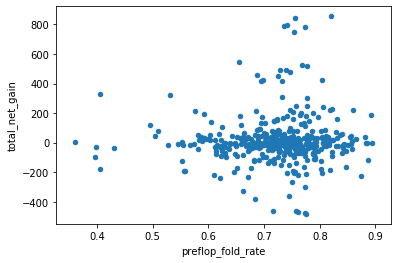

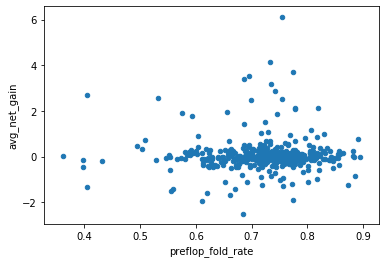

In [239]:
processed_df = summary_df[summary_df['total_net_gain'] > -500]
processed_df = processed_df[processed_df['total_games'] > 100]
processed_df.plot.scatter(x='preflop_fold_rate', y='total_net_gain')
processed_df.plot.scatter(x='preflop_fold_rate', y='avg_net_gain')

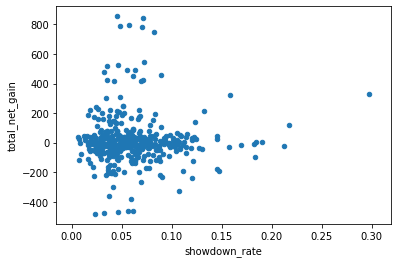

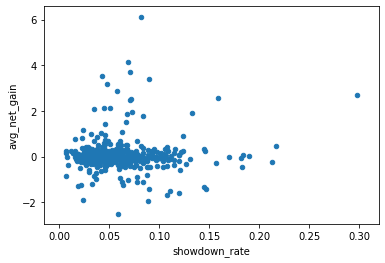

In [240]:
processed_df = summary_df[summary_df['total_net_gain'] > -500]
processed_df = processed_df[processed_df['total_games'] > 100]
processed_df.plot.scatter(x='showdown_rate', y='total_net_gain')
processed_df.plot.scatter(x='showdown_rate', y='avg_net_gain')

In [144]:
showdowns = {} # number of times a player goes to showdown
for _, row in river_df.iterrows():
    player_ID = row['player_ID']
    if player_ID not in showdowns:
        showdowns[player_ID] = 0
        
    if player_ID in showdowns and row['action_id'] != 'f':
        showdowns[player_ID] += 1

Text(0, 0.5, 'average net gain')

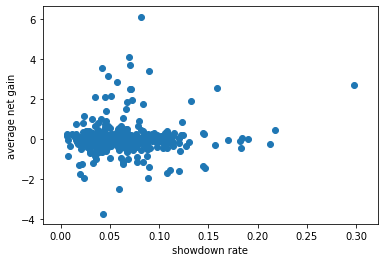